<a href="https://colab.research.google.com/github/vinicius-silva-ep/Topicos_Especiais_Em_Engenharia_Economica/blob/main/Simulando_Portfolios_e_Delineando_a_Fronteira_Eficiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> **Simulando portfólios e delineando a fronteira eficiente** </center>



# Instruções

* Crie duas listas diferentes com 4 ações (não compartilhe ações entre as listas)

* Para cada lista, simule $10^5$ portfólios com pesos aleatórios

* Utilize o índice Sharpe para comparar os desempenhos dos portfólios de cada lista de ações entre os anos 2017-2018 e entre 2018-2019.

* Discuta se houveram mudanças significativas no índice Sharpe do melhor portfólio selecionado de uma mesma lista de ações em anos diferentes.

OBSERVAÇÃO: Siga os passos trabalhados na Aula Prática 7 para criar os portfólios. Veja o que consegue aproveitar do código sem precisar repetí-lo por completo para cada lista de ações.



# Importando bibliotecas

In [128]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# (Toro Investimentos) Portfólios da primeira lista de ações entre os anos de 2017-2018 

In [129]:
## Escolhida a Toro Investimentos como primeiro portfólio

# Simulando portfólios aleatórios

In [130]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Definição de parâmetros

In [131]:
## Segundo o site Estadão, temos as melhores ações para investir em outubro segundo as carteiras as investidoras
n_portfolios = 10 ** 5
n_dias = 246
lista_acoes = ['ABEV3.SA', 'FLRY3.SA', 'TRPL4.SA','ALSO3.SA']
lista_acoes.sort()
data_inicial = '2017-01-01'
data_final = '2018-01-01'
n_acoes = len(lista_acoes)

In [132]:
precos_df = yf.download(lista_acoes, start=data_inicial,end=data_final, adjusted=True)
precos_df

[*********************100%***********************]  4 of 4 completed


Adj Close                                       Close             \
             ABEV3.SA   ALSO3.SA   FLRY3.SA   TRPL4.SA   ABEV3.SA   ALSO3.SA   
Date                                                                           
2017-01-02  13.968291  15.626526  14.054429   9.664001  16.309999  17.000000   
2017-01-03  14.250913  15.644909  13.981524   9.629559  16.639999  17.020000   
2017-01-04  14.139580  15.736833  14.293397   9.824245  16.510000  17.120001   
2017-01-05  14.216659  15.709254  14.580965   9.836226  16.600000  17.090000   
2017-01-06  14.096757  15.764407  14.580965   9.705935  16.459999  17.150000   
...               ...        ...        ...        ...        ...        ...   
2017-12-25  18.518196  23.565077  23.362082  10.255520  21.030001  25.100000   
2017-12-26  18.711918  23.799789  23.238474  10.291662  21.250000  25.350000   
2017-12-27  18.844004  23.968782  23.732908  10.261808  21.400000  25.530001   
2017-12-28  18.738337  23.799789  24.400394  10.511636  21.280001  25.350000   
2017-12-29  18.738337  23.799789  24.400394  10.511636  21.280001  25.350000   

                                       High             ...        Low  \
             FLRY3.SA   TRPL4.SA   ABEV3.SA   ALSO3.SA  ...   FLRY3.SA   
Date                                                    ...              
2017-01-02  17.350000  16.132500  16.660000  17.500000  ...  17.200001   
2017-01-03  17.260000  16.075001  16.670000  17.440001  ...  17.139999   
2017-01-04  17.645000  16.400000  16.660000  17.410000  ...  17.235001   
2017-01-05  18.000000  16.420000  16.750000  17.299999  ...  17.605000   
2017-01-06  18.000000  16.202499  16.639999  17.250000  ...  17.775000   
...               ...        ...        ...        ...  ...        ...   
2017-12-25  28.350000  16.317499  21.030001  25.100000  ...  28.350000   
2017-12-26  28.200001  16.375000  21.340000  25.490000  ...  28.090000   
2017-12-27  28.799999  16.327499  21.469999  25.690001  ...  28.190001   
2017-12-28  29.610001  16.725000  21.450001  25.790001  ...  28.600000   
2017-12-29  29.610001  16.725000  21.280001  25.350000  ...  29.610001   

                            Open                                     Volume  \
             TRPL4.SA   ABEV3.SA   ALSO3.SA   FLRY3.SA   TRPL4.SA  ABEV3.SA   
Date                                                                          
2017-01-02  16.075001  16.340000  17.400000  17.850000  16.205000   4265400   
2017-01-03  15.962500  16.500000  17.110001  17.299999  16.252501   9535500   
2017-01-04  16.094999  16.660000  17.180000  17.235001  16.120001   9426500   
2017-01-05  16.365000  16.520000  17.299999  17.605000  16.500000  11555800   
2017-01-06  16.202499  16.590000  17.209999  18.115000  16.352501   7863200   
...               ...        ...        ...        ...        ...       ...   
2017-12-25  16.317499  21.030001  25.100000  28.350000  16.317499         0   
2017-12-26  16.315001  21.030001  25.490000  28.530001  16.397499   8193200   
2017-12-27  16.209999  21.270000  25.170000  28.450001  16.375000   5441900   
2017-12-28  16.360001  21.400000  25.400000  28.799999  16.452499   9896000   
2017-12-29  16.725000  21.280001  25.350000  29.610001  16.725000         0   

                                       
           ALSO3.SA FLRY3.SA TRPL4.SA  
Date                                   
2017-01-02    19900   571000   371600  
2017-01-03    49500  1388400  1533200  
2017-01-04   115800  1196400  1475200  
2017-01-05    83600  3237400  1319200  
2017-01-06   186400   904400   993200  
...             ...      ...      ...  
2017-12-25        0        0        0  
2017-12-26    18900   951800   401600  
2017-12-27    20700  1086700   619600  
2017-12-28    50500  6117100  4104800  
2017-12-29        0        0        0  

[254 rows x 24 columns]

## Calculando retornos médios anualizados e a matriz de covariâncias

In [133]:
retornos_df = precos_df['Adj Close'].pct_change().dropna()
retornos_med = retornos_df.mean() * n_dias
mat_cov = retornos_df.cov() * n_dias
mat_cov

,ABEV3.SA,ALSO3.SA,FLRY3.SA,TRPL4.SA
ABEV3.SA,0.027445,0.009619,0.007784,0.005402
ALSO3.SA,0.009619,0.061610,0.015703,0.006127
FLRY3.SA,0.007784,0.015703,0.084066,0.008415
TRPL4.SA,0.005402,0.006127,0.008415,0.039079


In [134]:
retornos_med

ABEV3.SA    0.299484
ALSO3.SA    0.439940
FLRY3.SA    0.578288
TRPL4.SA    0.101222
dtype: float64

## Simulando pesos aleatórios para o portfólio

In [135]:
np.random.seed()
w = np.random.random(size=(n_portfolios, n_acoes))
w /= np.sum(w, axis=1)[:, np.newaxis]
w

array([[0.13185369, 0.16435423, 0.23963658, 0.46415551],
       [0.26023561, 0.35376776, 0.28855613, 0.0974405 ],
       [0.16448292, 0.11224155, 0.27404102, 0.44923451],
       ...,
       [0.10945572, 0.33059432, 0.07158427, 0.48836569],
       [0.30978503, 0.42758278, 0.14498575, 0.11764644],
       [0.22789521, 0.35141304, 0.17395431, 0.24673744]])

## Calculando métricas do portfólio

In [136]:
retorno_portf = np.dot(w, retornos_med)
vol_portf = []

for i in range(0, len(w)):
  vol_portf.append(np.sqrt(np.dot(w[i].T, np.dot(mat_cov, w[i]))))

vol_portf = np.array(vol_portf)
ind_sharpe = retorno_portf / vol_portf

## Criando um DataFrame com os dados

In [137]:
portf_results_df = pd.DataFrame({'retornos': retorno_portf, 'volatilidade': vol_portf, 'indice_sharpe': ind_sharpe})
portf_results_df

,retornos,volatilidade,indice_sharpe
0,0.297356,0.144920,2.051866
1,0.410305,0.155742,2.634511
2,0.302587,0.145703,2.076732
3,0.395769,0.179858,2.200458
4,0.369523,0.143772,2.570198
...,...,...,...
99995,0.416489,0.156673,2.658340
99996,0.309830,0.150060,2.064704
99997,0.269052,0.146693,1.834111
99998,0.376639,0.150657,2.499981


# Exibindo os portfólios simulados e a fronteira eficiente

## Localiza os pontos para criar a fronteira eficiente

In [138]:
n_pontos = 100
vol_portf_ef = []
indices_para_pular = []
retorno_portf_ef = np.linspace(portf_results_df.retornos.min(), portf_results_df.retornos.max(), n_pontos)
retorno_portf_ef = np.round(retorno_portf_ef, 2)
retorno_portf = np.round(retorno_portf, 2)

for indice_ponto in range(n_pontos):
  if retorno_portf_ef[indice_ponto] not in retorno_portf:
    indices_para_pular.append(indice_ponto)
    continue
  indice_encontrado = np.where(retorno_portf == retorno_portf_ef[indice_ponto])
  vol_portf_ef.append(np.min(vol_portf[indice_encontrado]))
  
retorno_portf_ef = np.delete(retorno_portf_ef, indices_para_pular)

## Plota portfólios e a fronteira eficiente

[]

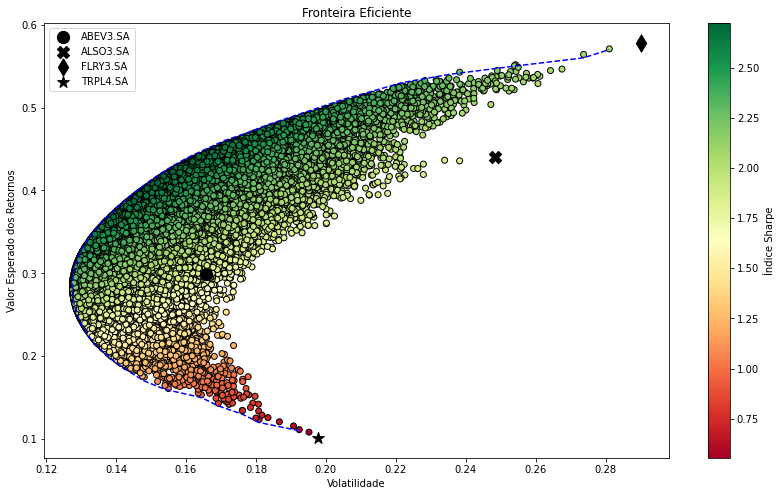

In [139]:
MARKS = ['o', 'X', 'd', '*']


fig, ax = plt.subplots(figsize=(14,8))
plt.scatter(portf_results_df.volatilidade, portf_results_df.retornos, c=portf_results_df.indice_sharpe, cmap='RdYlGn', edgecolors='black')
plt.colorbar(label='Índice Sharpe')


ax.set(xlabel='Volatilidade',
       ylabel='Valor Esperado dos Retornos',
       title='Fronteira Eficiente')
ax.plot(vol_portf_ef, retorno_portf_ef, 'b--')

for indice_acao in range(n_acoes):
  ax.scatter(x=np.sqrt(mat_cov.iloc[indice_acao, indice_acao]), 
             y=retornos_med[indice_acao], 
             marker=MARKS[indice_acao], 
             s=150, 
             color='black', 
             label=lista_acoes[indice_acao])
ax.legend()
plt.plot()

# Obtendo os portfólios com maior Índice Sharpe e menor volatilidade

## Exibindo os valores do índice Sharpe, Volatilidade e pesos dos portfólios

In [140]:
ind_sharpe_max = np.argmax(portf_results_df.indice_sharpe)
max_sharpe_portf = portf_results_df.loc[ind_sharpe_max]

ind_vol_min = np.argmin(portf_results_df.volatilidade)
min_vol_portf = portf_results_df.loc[ind_vol_min]

In [141]:
print('Portfólio com Índice Sharpe Máximo ----')
print('Performance')
for index, value in max_sharpe_portf.items():
  print(f'{index}: {100 * value:.2f}% ', end="", flush=True)

print('\nWeights')
for x, y in zip(lista_acoes, w[np.argmax(portf_results_df.indice_sharpe)]):
  print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Portfólio com Índice Sharpe Máximo ----
Performance
retornos: 41.85% volatilidade: 15.37% indice_sharpe: 272.24% 
Weights
ABEV3.SA: 43.35% ALSO3.SA: 26.55% FLRY3.SA: 29.65% TRPL4.SA: 0.45% 

In [142]:
print('Portfólio com Volatilidade Mínima ----')
print('Performance')
for index, value in min_vol_portf.items():
  print(f'{index}: {100 * value:.2f}% ', end="", flush=True)

print('\nWeights')
for x, y in zip(lista_acoes, w[np.argmin(portf_results_df.volatilidade)]):
  print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Portfólio com Volatilidade Mínima ----
Performance
retornos: 28.24% volatilidade: 12.76% indice_sharpe: 221.39% 
Weights
ABEV3.SA: 46.41% ALSO3.SA: 13.18% FLRY3.SA: 9.33% TRPL4.SA: 31.07% 

## Identificando graficamente os porfólios

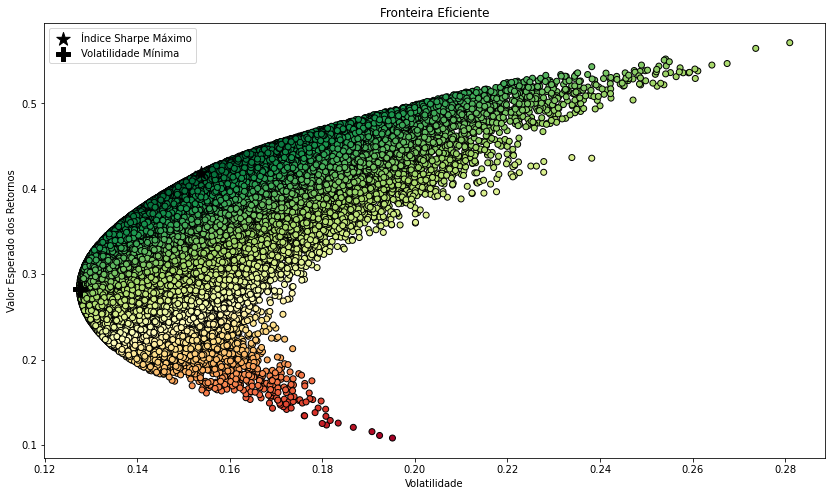

In [143]:
fig, ax = plt.subplots(figsize=(14,8))

plt.scatter(portf_results_df.volatilidade, portf_results_df.retornos, c=portf_results_df.indice_sharpe, cmap='RdYlGn', edgecolors='black')

ax.scatter(x=max_sharpe_portf.volatilidade, y=max_sharpe_portf.retornos, c='black', marker='*', s=200, label='Índice Sharpe Máximo')
ax.scatter(x=min_vol_portf.volatilidade, y=min_vol_portf.retornos, c='black', marker='P', s=200, label='Volatilidade Mínima')
ax.set(xlabel='Volatilidade', ylabel='Valor Esperado dos Retornos', title='Fronteira Eficiente')
ax.legend()
plt.show()

# (Toro Investimentos) Portfólios da primeira lista de ações entre os anos de 2018-2019
 

## Definição de parâmetros

In [144]:
## Segundo o site Estadão, temos as melhores ações para investir em outubro segundo as carteiras as investidoras
## Selecionado os anos de 2018-2019
n_portfolios = 10 ** 5
n_dias = 246
lista_acoes = ['ABEV3.SA', 'FLRY3.SA', 'TRPL4.SA','ALSO3.SA']
lista_acoes.sort()
data_inicial = '2018-01-01'
data_final = '2019-01-01'
n_acoes = len(lista_acoes)

In [145]:
precos_df = yf.download(lista_acoes, start=data_inicial,end=data_final, adjusted=True)
precos_df

[*********************100%***********************]  4 of 4 completed


Adj Close                                       Close             \
             ABEV3.SA   ALSO3.SA   FLRY3.SA   TRPL4.SA   ABEV3.SA   ALSO3.SA   
Date                                                                           
2018-01-02  19.099367  23.508745  24.474567  10.588625  21.690001  25.040001   
2018-01-03  19.143394  23.687128  23.994532  10.373366  21.740000  25.230000   
2018-01-04  19.037725  23.630796  23.514473  10.088971  21.620001  25.170000   
2018-01-05  19.108171  23.658962  23.853825  10.250808  21.700001  25.200001   
2018-01-08  19.072947  23.001768  23.233061  10.197387  21.660000  24.500000   
...               ...        ...        ...        ...        ...        ...   
2018-12-20  13.830712  24.234358  16.731249  12.708755  15.210000  25.299999   
2018-12-21  13.794340  24.425934  16.816483  12.880013  15.170000  25.500000   
2018-12-26  13.767060  24.330145  16.637495  12.759569  15.140000  25.400000   
2018-12-27  13.730688  24.330145  16.586355  12.806620  15.100000  25.400000   
2018-12-28  13.985297  24.684561  16.859100  13.019275  15.380000  25.770000   

                                       High             ...        Low  \
             FLRY3.SA   TRPL4.SA   ABEV3.SA   ALSO3.SA  ...   FLRY3.SA   
Date                                                    ...              
2018-01-02  29.700001  16.847500  21.750000  25.580000  ...  29.410000   
2018-01-03  28.990000  16.504999  21.969999  25.250000  ...  28.809999   
2018-01-04  28.410000  16.052500  21.820000  25.860001  ...  28.379999   
2018-01-05  28.820000  16.309999  21.750000  25.990000  ...  28.190001   
2018-01-08  28.070000  16.225000  21.700001  25.410000  ...  28.070000   
...               ...        ...        ...        ...  ...        ...   
2018-12-20  19.629999  16.882500  15.660000  25.500000  ...  19.360001   
2018-12-21  19.730000  17.110001  15.330000  25.500000  ...  19.690001   
2018-12-26  19.520000  16.950001  15.450000  25.440001  ...  19.250000   
2018-12-27  19.459999  17.012501  15.400000  25.799999  ...  19.330000   
2018-12-28  19.780001  17.295000  15.670000  26.740000  ...  19.480000   

                            Open                                     Volume  \
             TRPL4.SA   ABEV3.SA   ALSO3.SA   FLRY3.SA   TRPL4.SA  ABEV3.SA   
Date                                                                          
2018-01-02  16.527500  21.330000  25.580000  29.709999  16.592501  12717900   
2018-01-03  16.475000  21.559999  25.000000  29.690001  16.762501   9389900   
2018-01-04  16.052500  21.740000  25.230000  29.350000  16.517500   9150100   
2018-01-05  16.030001  21.620001  25.260000  28.500000  16.147499  11510200   
2018-01-08  16.030001  21.700001  25.240000  28.790001  16.389999   7074000   
...               ...        ...        ...        ...        ...       ...   
2018-12-20  16.697500  15.630000  25.490000  19.770000  16.725000  14676600   
2018-12-21  16.692499  15.260000  25.040001  19.809999  16.920000  46930400   
2018-12-26  16.790001  15.100000  25.440001  19.790001  17.107500  11460500   
2018-12-27  16.825001  15.140000  25.450001  19.559999  17.110001  12544400   
2018-12-28  16.952499  15.230000  25.500000  19.639999  17.092501  15498800   

                                       
           ALSO3.SA FLRY3.SA TRPL4.SA  
Date                                   
2018-01-02    22000  2146900  1127600  
2018-01-03     8300  1537900  1131200  
2018-01-04    54100  1837900  1856000  
2018-01-05    48300  1428400   834400  
2018-01-08    89700  1547900  1306000  
...             ...      ...      ...  
2018-12-20    19400  1765300  1766000  
2018-12-21    39900  2923700  3481200  
2018-12-26     8000  2002300  1230800  
2018-12-27    19400  1504500  1470400  
2018-12-28    52600  1664800  1370400  

[246 rows x 24 columns]

## Calculando retornos médios anualizados e a matriz de covariâncias

In [146]:
retornos_df = precos_df['Adj Close'].pct_change().dropna()
retornos_med = retornos_df.mean() * n_dias
mat_cov = retornos_df.cov() * n_dias
mat_cov

,ABEV3.SA,ALSO3.SA,FLRY3.SA,TRPL4.SA
ABEV3.SA,0.045605,0.008502,0.017426,0.011978
ALSO3.SA,0.008502,0.058438,0.014227,0.009521
FLRY3.SA,0.017426,0.014227,0.106752,0.025466
TRPL4.SA,0.011978,0.009521,0.025466,0.047148


In [147]:
retornos_med

ABEV3.SA   -0.289970
ALSO3.SA    0.077888
FLRY3.SA   -0.321012
TRPL4.SA    0.231002
dtype: float64

## Simulando pesos aleatórios para o portfólio

In [148]:
np.random.seed()
w = np.random.random(size=(n_portfolios, n_acoes))
w /= np.sum(w, axis=1)[:, np.newaxis]
w

array([[0.38747327, 0.18146507, 0.0379936 , 0.39306806],
       [0.21532893, 0.40733933, 0.05695574, 0.320376  ],
       [0.09633329, 0.08818072, 0.3869237 , 0.42856228],
       ...,
       [0.58033089, 0.32231892, 0.02257942, 0.07477078],
       [0.2823219 , 0.09204364, 0.28379586, 0.3418386 ],
       [0.191383  , 0.2786044 , 0.18896817, 0.34104443]])

## Calculando métricas do portfólio

In [149]:
retorno_portf = np.dot(w, retornos_med)
vol_portf = []

for i in range(0, len(w)):
  vol_portf.append(np.sqrt(np.dot(w[i].T, np.dot(mat_cov, w[i]))))

vol_portf = np.array(vol_portf)
ind_sharpe = retorno_portf / vol_portf

## Criando um DataFrame com os dados

In [150]:
portf_results_df = pd.DataFrame({'retornos': retorno_portf, 'volatilidade': vol_portf, 'indice_sharpe': ind_sharpe})
portf_results_df

,retornos,volatilidade,indice_sharpe
0,-0.019618,0.154539,-0.126948
1,0.025012,0.156979,0.159334
2,-0.046274,0.195160,-0.237108
3,-0.127691,0.197050,-0.648011
4,-0.058657,0.195909,-0.299409
...,...,...,...
99995,-0.177904,0.175437,-1.014061
99996,-0.100250,0.176290,-0.568670
99997,-0.133150,0.164855,-0.807677
99998,-0.086832,0.173398,-0.500768


# Exibindo os portfólios simulados e a fronteira eficiente

## Localiza os pontos para criar a fronteira eficiente

In [151]:
n_pontos = 100
vol_portf_ef = []
indices_para_pular = []
retorno_portf_ef = np.linspace(portf_results_df.retornos.min(), portf_results_df.retornos.max(), n_pontos)
retorno_portf_ef = np.round(retorno_portf_ef, 2)
retorno_portf = np.round(retorno_portf, 2)

for indice_ponto in range(n_pontos):
  if retorno_portf_ef[indice_ponto] not in retorno_portf:
    indices_para_pular.append(indice_ponto)
    continue
  indice_encontrado = np.where(retorno_portf == retorno_portf_ef[indice_ponto])
  vol_portf_ef.append(np.min(vol_portf[indice_encontrado]))
  
retorno_portf_ef = np.delete(retorno_portf_ef, indices_para_pular)

## Plota portfólios e a fronteira eficiente

[]

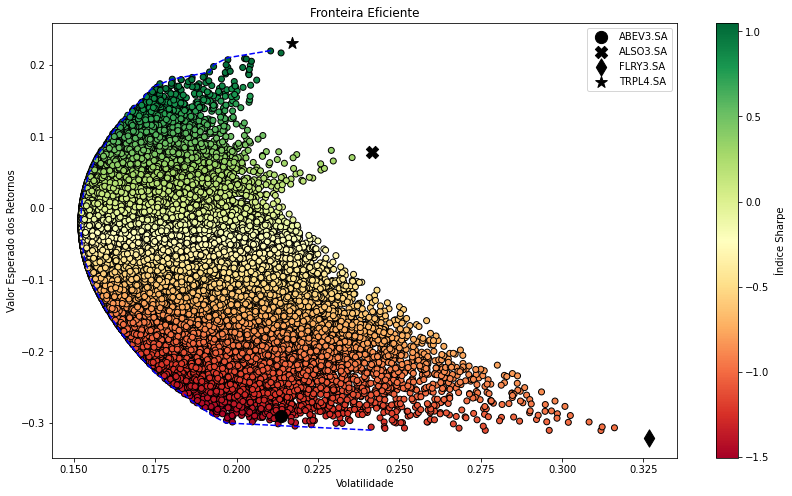

In [152]:
MARKS = ['o', 'X', 'd', '*']


fig, ax = plt.subplots(figsize=(14,8))
plt.scatter(portf_results_df.volatilidade, portf_results_df.retornos, c=portf_results_df.indice_sharpe, cmap='RdYlGn', edgecolors='black')
plt.colorbar(label='Índice Sharpe')


ax.set(xlabel='Volatilidade',
       ylabel='Valor Esperado dos Retornos',
       title='Fronteira Eficiente')
ax.plot(vol_portf_ef, retorno_portf_ef, 'b--')

for indice_acao in range(n_acoes):
  ax.scatter(x=np.sqrt(mat_cov.iloc[indice_acao, indice_acao]), 
             y=retornos_med[indice_acao], 
             marker=MARKS[indice_acao], 
             s=150, 
             color='black', 
             label=lista_acoes[indice_acao])
ax.legend()
plt.plot()

# Obtendo os portfólios com maior Índice Sharpe e menor volatilidade

## Exibindo os valores do índice Sharpe, Volatilidade e pesos dos portfólios

In [153]:
ind_sharpe_max = np.argmax(portf_results_df.indice_sharpe)
max_sharpe_portf = portf_results_df.loc[ind_sharpe_max]

ind_vol_min = np.argmin(portf_results_df.volatilidade)
min_vol_portf = portf_results_df.loc[ind_vol_min]

In [154]:
print('Portfólio com Índice Sharpe Máximo ----')
print('Performance')
for index, value in max_sharpe_portf.items():
  print(f'{index}: {100 * value:.2f}% ', end="", flush=True)

print('\nWeights')
for x, y in zip(lista_acoes, w[np.argmax(portf_results_df.indice_sharpe)]):
  print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Portfólio com Índice Sharpe Máximo ----
Performance
retornos: 20.71% volatilidade: 19.73% indice_sharpe: 104.99% 
Weights
ABEV3.SA: 0.43% ALSO3.SA: 11.91% FLRY3.SA: 0.62% TRPL4.SA: 87.04% 

In [155]:
print('Portfólio com Volatilidade Mínima ----')
print('Performance')
for index, value in min_vol_portf.items():
  print(f'{index}: {100 * value:.2f}% ', end="", flush=True)

print('\nWeights')
for x, y in zip(lista_acoes, w[np.argmin(portf_results_df.volatilidade)]):
  print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Portfólio com Volatilidade Mínima ----
Performance
retornos: -2.03% volatilidade: 15.21% indice_sharpe: -13.35% 
Weights
ABEV3.SA: 35.41% ALSO3.SA: 27.87% FLRY3.SA: 4.37% TRPL4.SA: 32.34% 

## Identificando graficamente os porfólios

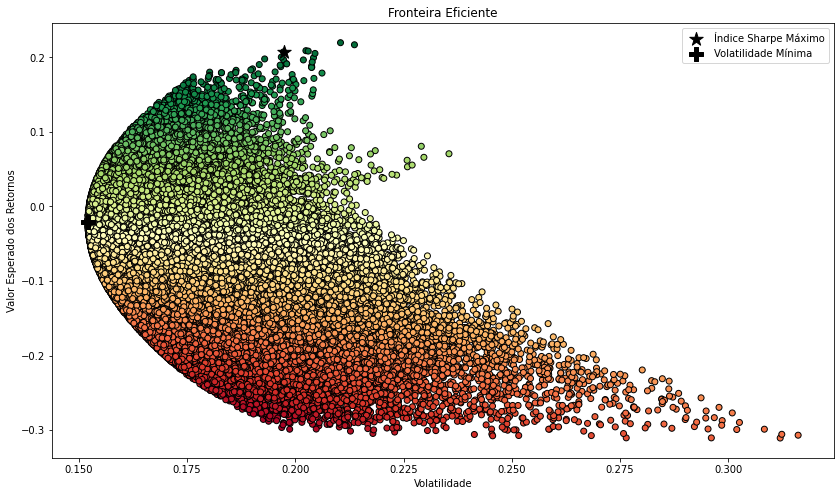

In [156]:
fig, ax = plt.subplots(figsize=(14,8))

plt.scatter(portf_results_df.volatilidade, portf_results_df.retornos, c=portf_results_df.indice_sharpe, cmap='RdYlGn', edgecolors='black')

ax.scatter(x=max_sharpe_portf.volatilidade, y=max_sharpe_portf.retornos, c='black', marker='*', s=200, label='Índice Sharpe Máximo')
ax.scatter(x=min_vol_portf.volatilidade, y=min_vol_portf.retornos, c='black', marker='P', s=200, label='Volatilidade Mínima')
ax.set(xlabel='Volatilidade', ylabel='Valor Esperado dos Retornos', title='Fronteira Eficiente')
ax.legend()
plt.show()

É notório perceber que entre 2018-2019 esse portfólio de ações foi notavelmente mais baixo em comparação a 2017-2018. Pode ser devido fatores externos, por exemplo, como o mercado se comportou diante da nova gestão do país, tendo em vista que 2018 foi ano de eleição, em 2019 um novo presidente assume.
Valores: 


*   2017-2018 Portfólio com Índice Sharpe Máximo: 272.24% (Índice Sharpe)
*   2017-2018 Portfólio com Volatilidade Mínima: 221.39% (Índice Sharpe)
*   2018-2019 Portfólio com Índice Sharpe Máximo: 104.99% (Índice Sharpe)
*   2018-2019 Portfólio com Volatilidade Mínima: -13.35% (Índice Sharpe)


# (BTG Pactual) Portfólios da primeira lista de ações entre os anos de 2017-2018 

In [157]:
## Escolhida a BTG Pactual como segundo portfólio

# Simulando portfólios aleatórios

In [158]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Definição de parâmetros

In [159]:
## Segundo o site Estadão, temos as melhores ações para investir em outubro segundo as carteiras as investidoras
n_portfolios = 10 ** 5
n_dias = 246
lista_acoes = ['CYRE3.SA', 'RENT3.SA', 'LREN3.SA','SBSP3.SA']
lista_acoes.sort()
data_inicial = '2017-01-01'
data_final = '2018-01-01'
n_acoes = len(lista_acoes)

In [160]:
precos_df = yf.download(lista_acoes, start=data_inicial,end=data_final, adjusted=True)
precos_df

[*********************100%***********************]  4 of 4 completed


Adj Close                                     Close             \
            CYRE3.SA   LREN3.SA   RENT3.SA   SBSP3.SA CYRE3.SA   LREN3.SA   
Date                                                                        
2017-01-02  7.488752  17.249983   9.875716  24.308308    10.28  18.972677   
2017-01-03  8.122527  17.779268  10.291208  24.591064    11.15  19.554813   
2017-01-04  8.421203  17.622713  10.455142  25.302233    11.56  19.382631   
2017-01-05  8.311931  17.458719  10.296861  25.370777    11.41  19.202253   
2017-01-06  8.260939  17.257433  10.294031  25.002340    11.34  18.980877   
...              ...        ...        ...        ...      ...        ...   
2017-12-25  9.626225  27.981022  19.334990  30.100481    13.12  30.394001   
2017-12-26  9.589539  28.744894  19.497618  30.527439    13.07  31.223749   
2017-12-27  9.648236  29.475550  20.175245  30.687548    13.15  32.017422   
2017-12-28  9.699596  29.467251  19.931301  30.536337    13.22  32.008400   
2017-12-29  9.699596  29.467251  19.931301  30.536337    13.22  32.008400   

                                     High             ...        Low  \
             RENT3.SA   SBSP3.SA CYRE3.SA   LREN3.SA  ...   RENT3.SA   
Date                                                  ...              
2017-01-02  10.563869  28.370001    10.46  19.013674  ...  10.201058   
2017-01-03  11.008314  28.700001    11.22  19.677799  ...  10.566893   
2017-01-04  11.183673  29.530001    11.84  19.833582  ...  10.829931   
2017-01-05  11.014361  29.610001    11.65  19.587610  ...  10.923658   
2017-01-06  11.011337  29.180000    11.50  19.202253  ...  10.842025   
...               ...        ...      ...        ...  ...        ...   
2017-12-25  20.380953  33.840000    13.12  30.394001  ...  20.380953   
2017-12-26  20.552380  34.320000    13.35  31.458242  ...  20.276190   
2017-12-27  21.266666  34.500000    13.31  32.179764  ...  20.580952   
2017-12-28  21.009523  34.330002    13.44  32.170742  ...  20.809523   
2017-12-29  21.009523  34.330002    13.22  32.008400  ...  21.009523   

                          Open                                    Volume  \
             SBSP3.SA CYRE3.SA   LREN3.SA   RENT3.SA   SBSP3.SA CYRE3.SA   
Date                                                                       
2017-01-02  27.270000    10.15  18.775900  10.249433  28.450001  1133200   
2017-01-03  28.389999    10.29  19.103865  10.660619  28.670000  3294900   
2017-01-04  28.459999    11.00  19.636805  10.899470  28.459999  4718600   
2017-01-05  29.170000    11.64  19.464622  11.277399  29.719999  3998600   
2017-01-06  28.850000    11.36  19.202253  11.014361  29.610001  2099600   
...               ...      ...        ...        ...        ...      ...   
2017-12-25  33.840000    13.12  30.394001  20.380953  33.840000        0   
2017-12-26  33.910000    13.29  30.348906  20.409523  33.919998  1159000   
2017-12-27  34.119999    13.10  31.503338  20.580952  34.500000   736700   
2017-12-28  34.270000    13.34  32.017422  21.276190  34.500000  1030900   
2017-12-29  34.330002    13.22  32.008400  21.009523  34.330002        0   

                                       
           LREN3.SA RENT3.SA SBSP3.SA  
Date                                   
2017-01-02   676417  1828055   536100  
2017-01-03  2976064  3878043  1317900  
2017-01-04  2671030  3750705  1305700  
2017-01-05  3587596  3000564  1281100  
2017-01-06  2139141  1927280   828700  
...             ...      ...      ...  
2017-12-25        0        0        0  
2017-12-26  1542633  1284570   357800  
2017-12-27  2097130  1457295   714700  
2017-12-28  1957646  2995125  1796000  
2017-12-29        0        0        0  

[254 rows x 24 columns]

## Calculando retornos médios anualizados e a matriz de covariâncias

In [161]:
retornos_df = precos_df['Adj Close'].pct_change().dropna()
retornos_med = retornos_df.mean() * n_dias
mat_cov = retornos_df.cov() * n_dias
mat_cov

,CYRE3.SA,LREN3.SA,RENT3.SA,SBSP3.SA
CYRE3.SA,0.119155,0.049736,0.038503,0.041755
LREN3.SA,0.049736,0.078858,0.037344,0.030594
RENT3.SA,0.038503,0.037344,0.080169,0.027039
SBSP3.SA,0.041755,0.030594,0.027039,0.088822


In [162]:
retornos_med

CYRE3.SA    0.312466
LREN3.SA    0.560450
RENT3.SA    0.723451
SBSP3.SA    0.266255
dtype: float64

## Simulando pesos aleatórios para o portfólio

In [163]:
np.random.seed()
w = np.random.random(size=(n_portfolios, n_acoes))
w /= np.sum(w, axis=1)[:, np.newaxis]
w

array([[0.13198496, 0.4445333 , 0.02357994, 0.3999018 ],
       [0.52730926, 0.16673155, 0.02315334, 0.28280586],
       [0.2573888 , 0.26321052, 0.21975098, 0.25964971],
       ...,
       [0.2511394 , 0.32788017, 0.24699453, 0.1739859 ],
       [0.27449312, 0.21079575, 0.23546121, 0.27924992],
       [0.11080223, 0.28661106, 0.04394552, 0.5586412 ]])

## Calculando métricas do portfólio

In [164]:
retorno_portf = np.dot(w, retornos_med)
vol_portf = []

for i in range(0, len(w)):
  vol_portf.append(np.sqrt(np.dot(w[i].T, np.dot(mat_cov, w[i]))))

vol_portf = np.array(vol_portf)
ind_sharpe = retorno_portf / vol_portf

## Criando um DataFrame com os dados

In [165]:
portf_results_df = pd.DataFrame({'retornos': retorno_portf, 'volatilidade': vol_portf, 'indice_sharpe': ind_sharpe})
portf_results_df

,retornos,volatilidade,indice_sharpe
0,0.413914,0.233584,1.772012
1,0.350260,0.261031,1.341830
2,0.456054,0.226891,2.010010
3,0.480490,0.262541,1.830151
4,0.454810,0.222929,2.040153
...,...,...,...
99995,0.464126,0.222238,2.088416
99996,0.370837,0.237463,1.561666
99997,0.487246,0.228149,2.135649
99998,0.448607,0.227710,1.970083


# Exibindo os portfólios simulados e a fronteira eficiente

## Localiza os pontos para criar a fronteira eficiente

In [166]:
n_pontos = 100
vol_portf_ef = []
indices_para_pular = []
retorno_portf_ef = np.linspace(portf_results_df.retornos.min(), portf_results_df.retornos.max(), n_pontos)
retorno_portf_ef = np.round(retorno_portf_ef, 2)
retorno_portf = np.round(retorno_portf, 2)

for indice_ponto in range(n_pontos):
  if retorno_portf_ef[indice_ponto] not in retorno_portf:
    indices_para_pular.append(indice_ponto)
    continue
  indice_encontrado = np.where(retorno_portf == retorno_portf_ef[indice_ponto])
  vol_portf_ef.append(np.min(vol_portf[indice_encontrado]))
  
retorno_portf_ef = np.delete(retorno_portf_ef, indices_para_pular)

## Plota portfólios e a fronteira eficiente

[]

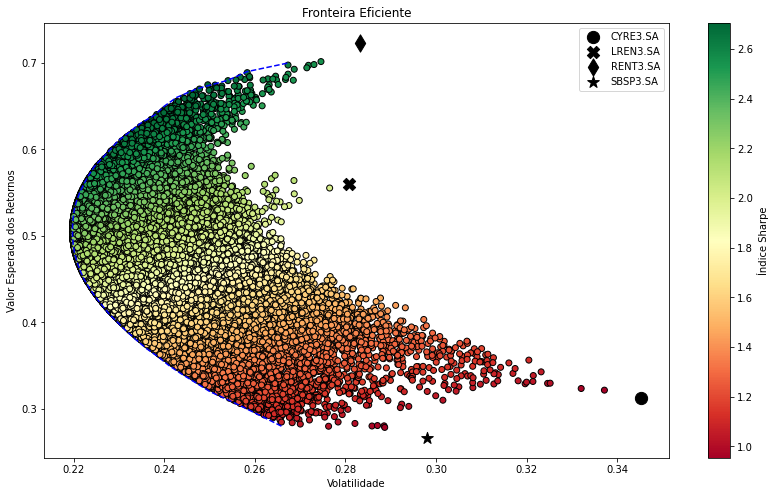

In [167]:
MARKS = ['o', 'X', 'd', '*']


fig, ax = plt.subplots(figsize=(14,8))
plt.scatter(portf_results_df.volatilidade, portf_results_df.retornos, c=portf_results_df.indice_sharpe, cmap='RdYlGn', edgecolors='black')
plt.colorbar(label='Índice Sharpe')


ax.set(xlabel='Volatilidade',
       ylabel='Valor Esperado dos Retornos',
       title='Fronteira Eficiente')
ax.plot(vol_portf_ef, retorno_portf_ef, 'b--')

for indice_acao in range(n_acoes):
  ax.scatter(x=np.sqrt(mat_cov.iloc[indice_acao, indice_acao]), 
             y=retornos_med[indice_acao], 
             marker=MARKS[indice_acao], 
             s=150, 
             color='black', 
             label=lista_acoes[indice_acao])
ax.legend()
plt.plot()

# Obtendo os portfólios com maior Índice Sharpe e menor volatilidade

## Exibindo os valores do índice Sharpe, Volatilidade e pesos dos portfólios

In [168]:
ind_sharpe_max = np.argmax(portf_results_df.indice_sharpe)
max_sharpe_portf = portf_results_df.loc[ind_sharpe_max]

ind_vol_min = np.argmin(portf_results_df.volatilidade)
min_vol_portf = portf_results_df.loc[ind_vol_min]

In [169]:
print('Portfólio com Índice Sharpe Máximo ----')
print('Performance')
for index, value in max_sharpe_portf.items():
  print(f'{index}: {100 * value:.2f}% ', end="", flush=True)

print('\nWeights')
for x, y in zip(lista_acoes, w[np.argmax(portf_results_df.indice_sharpe)]):
  print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Portfólio com Índice Sharpe Máximo ----
Performance
retornos: 66.46% volatilidade: 24.57% indice_sharpe: 270.53% 
Weights
CYRE3.SA: 0.57% LREN3.SA: 34.61% RENT3.SA: 64.81% SBSP3.SA: 0.02% 

In [170]:
print('Portfólio com Volatilidade Mínima ----')
print('Performance')
for index, value in min_vol_portf.items():
  print(f'{index}: {100 * value:.2f}% ', end="", flush=True)

print('\nWeights')
for x, y in zip(lista_acoes, w[np.argmin(portf_results_df.volatilidade)]):
  print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Portfólio com Volatilidade Mínima ----
Performance
retornos: 50.52% volatilidade: 21.97% indice_sharpe: 229.92% 
Weights
CYRE3.SA: 6.48% LREN3.SA: 29.09% RENT3.SA: 32.89% SBSP3.SA: 31.54% 

## Identificando graficamente os porfólios

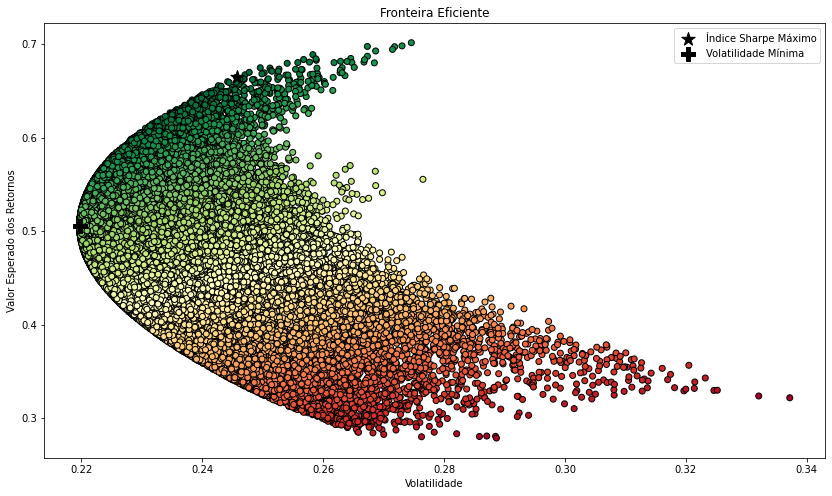

In [171]:
fig, ax = plt.subplots(figsize=(14,8))

plt.scatter(portf_results_df.volatilidade, portf_results_df.retornos, c=portf_results_df.indice_sharpe, cmap='RdYlGn', edgecolors='black')

ax.scatter(x=max_sharpe_portf.volatilidade, y=max_sharpe_portf.retornos, c='black', marker='*', s=200, label='Índice Sharpe Máximo')
ax.scatter(x=min_vol_portf.volatilidade, y=min_vol_portf.retornos, c='black', marker='P', s=200, label='Volatilidade Mínima')
ax.set(xlabel='Volatilidade', ylabel='Valor Esperado dos Retornos', title='Fronteira Eficiente')
ax.legend()
plt.show()

# (BTG Pactual) Portfólios da primeira lista de ações entre os anos de 2018-2019
 

## Definição de parâmetros

In [172]:
## Segundo o site Estadão, temos as melhores ações para investir em outubro segundo as carteiras as investidoras
## Selecionado os anos de 2018-2019
n_portfolios = 10 ** 5
n_dias = 246
lista_acoes = ['ABEV3.SA', 'FLRY3.SA', 'TRPL4.SA','ALSO3.SA']
lista_acoes.sort()
data_inicial = '2018-01-01'
data_final = '2019-01-01'
n_acoes = len(lista_acoes)

In [173]:
precos_df = yf.download(lista_acoes, start=data_inicial,end=data_final, adjusted=True)
precos_df

[*********************100%***********************]  4 of 4 completed


Adj Close                                       Close             \
             ABEV3.SA   ALSO3.SA   FLRY3.SA   TRPL4.SA   ABEV3.SA   ALSO3.SA   
Date                                                                           
2018-01-02  19.099367  23.508747  24.474560  10.588628  21.690001  25.040001   
2018-01-03  19.143394  23.687128  23.994532  10.373363  21.740000  25.230000   
2018-01-04  19.037725  23.630796  23.514477  10.088970  21.620001  25.170000   
2018-01-05  19.108170  23.658962  23.853825  10.250809  21.700001  25.200001   
2018-01-08  19.072950  23.001768  23.233065  10.197387  21.660000  24.500000   
...               ...        ...        ...        ...        ...        ...   
2018-12-20  13.830713  24.234358  16.731251  12.708756  15.210000  25.299999   
2018-12-21  13.794341  24.425932  16.816484  12.880014  15.170000  25.500000   
2018-12-26  13.767061  24.330145  16.637491  12.759569  15.140000  25.400000   
2018-12-27  13.730689  24.330145  16.586351  12.806619  15.100000  25.400000   
2018-12-28  13.985298  24.684561  16.859100  13.019276  15.380000  25.770000   

                                       High             ...        Low  \
             FLRY3.SA   TRPL4.SA   ABEV3.SA   ALSO3.SA  ...   FLRY3.SA   
Date                                                    ...              
2018-01-02  29.700001  16.847500  21.750000  25.580000  ...  29.410000   
2018-01-03  28.990000  16.504999  21.969999  25.250000  ...  28.809999   
2018-01-04  28.410000  16.052500  21.820000  25.860001  ...  28.379999   
2018-01-05  28.820000  16.309999  21.750000  25.990000  ...  28.190001   
2018-01-08  28.070000  16.225000  21.700001  25.410000  ...  28.070000   
...               ...        ...        ...        ...  ...        ...   
2018-12-20  19.629999  16.882500  15.660000  25.500000  ...  19.360001   
2018-12-21  19.730000  17.110001  15.330000  25.500000  ...  19.690001   
2018-12-26  19.520000  16.950001  15.450000  25.440001  ...  19.250000   
2018-12-27  19.459999  17.012501  15.400000  25.799999  ...  19.330000   
2018-12-28  19.780001  17.295000  15.670000  26.740000  ...  19.480000   

                            Open                                     Volume  \
             TRPL4.SA   ABEV3.SA   ALSO3.SA   FLRY3.SA   TRPL4.SA  ABEV3.SA   
Date                                                                          
2018-01-02  16.527500  21.330000  25.580000  29.709999  16.592501  12717900   
2018-01-03  16.475000  21.559999  25.000000  29.690001  16.762501   9389900   
2018-01-04  16.052500  21.740000  25.230000  29.350000  16.517500   9150100   
2018-01-05  16.030001  21.620001  25.260000  28.500000  16.147499  11510200   
2018-01-08  16.030001  21.700001  25.240000  28.790001  16.389999   7074000   
...               ...        ...        ...        ...        ...       ...   
2018-12-20  16.697500  15.630000  25.490000  19.770000  16.725000  14676600   
2018-12-21  16.692499  15.260000  25.040001  19.809999  16.920000  46930400   
2018-12-26  16.790001  15.100000  25.440001  19.790001  17.107500  11460500   
2018-12-27  16.825001  15.140000  25.450001  19.559999  17.110001  12544400   
2018-12-28  16.952499  15.230000  25.500000  19.639999  17.092501  15498800   

                                       
           ALSO3.SA FLRY3.SA TRPL4.SA  
Date                                   
2018-01-02    22000  2146900  1127600  
2018-01-03     8300  1537900  1131200  
2018-01-04    54100  1837900  1856000  
2018-01-05    48300  1428400   834400  
2018-01-08    89700  1547900  1306000  
...             ...      ...      ...  
2018-12-20    19400  1765300  1766000  
2018-12-21    39900  2923700  3481200  
2018-12-26     8000  2002300  1230800  
2018-12-27    19400  1504500  1470400  
2018-12-28    52600  1664800  1370400  

[246 rows x 24 columns]

## Calculando retornos médios anualizados e a matriz de covariâncias

In [174]:
retornos_df = precos_df['Adj Close'].pct_change().dropna()
retornos_med = retornos_df.mean() * n_dias
mat_cov = retornos_df.cov() * n_dias
mat_cov

,ABEV3.SA,ALSO3.SA,FLRY3.SA,TRPL4.SA
ABEV3.SA,0.045605,0.008502,0.017426,0.011978
ALSO3.SA,0.008502,0.058438,0.014227,0.009521
FLRY3.SA,0.017426,0.014227,0.106752,0.025466
TRPL4.SA,0.011978,0.009521,0.025466,0.047148


In [175]:
retornos_med

ABEV3.SA   -0.289970
ALSO3.SA    0.077888
FLRY3.SA   -0.321012
TRPL4.SA    0.231002
dtype: float64

## Simulando pesos aleatórios para o portfólio

In [176]:
np.random.seed()
w = np.random.random(size=(n_portfolios, n_acoes))
w /= np.sum(w, axis=1)[:, np.newaxis]
w

array([[0.29601862, 0.17613057, 0.3171334 , 0.21071741],
       [0.65492161, 0.24865442, 0.04653831, 0.04988566],
       [0.42923244, 0.06931741, 0.10509369, 0.39635647],
       ...,
       [0.03258245, 0.13627717, 0.51157951, 0.31956088],
       [0.29134206, 0.45548997, 0.00826179, 0.24490618],
       [0.2007418 , 0.25995838, 0.31009638, 0.22920343]])

## Calculando métricas do portfólio

In [177]:
retorno_portf = np.dot(w, retornos_med)
vol_portf = []

for i in range(0, len(w)):
  vol_portf.append(np.sqrt(np.dot(w[i].T, np.dot(mat_cov, w[i]))))

vol_portf = np.array(vol_portf)
ind_sharpe = retorno_portf / vol_portf

## Criando um DataFrame com os dados

In [178]:
portf_results_df = pd.DataFrame({'retornos': retorno_portf, 'volatilidade': vol_portf, 'indice_sharpe': ind_sharpe})
portf_results_df

,retornos,volatilidade,indice_sharpe
0,-0.125245,0.173180,-0.723210
1,-0.173956,0.169766,-1.024678
2,-0.061243,0.162095,-0.377819
3,-0.114713,0.163431,-0.701906
4,-0.041692,0.214301,-0.194551
...,...,...,...
99995,-0.032462,0.178051,-0.182319
99996,-0.154019,0.181113,-0.850402
99997,-0.089237,0.214317,-0.416380
99998,0.004919,0.158790,0.030976


# Exibindo os portfólios simulados e a fronteira eficiente

## Localiza os pontos para criar a fronteira eficiente

In [179]:
n_pontos = 100
vol_portf_ef = []
indices_para_pular = []
retorno_portf_ef = np.linspace(portf_results_df.retornos.min(), portf_results_df.retornos.max(), n_pontos)
retorno_portf_ef = np.round(retorno_portf_ef, 2)
retorno_portf = np.round(retorno_portf, 2)

for indice_ponto in range(n_pontos):
  if retorno_portf_ef[indice_ponto] not in retorno_portf:
    indices_para_pular.append(indice_ponto)
    continue
  indice_encontrado = np.where(retorno_portf == retorno_portf_ef[indice_ponto])
  vol_portf_ef.append(np.min(vol_portf[indice_encontrado]))
  
retorno_portf_ef = np.delete(retorno_portf_ef, indices_para_pular)

## Plota portfólios e a fronteira eficiente

[]

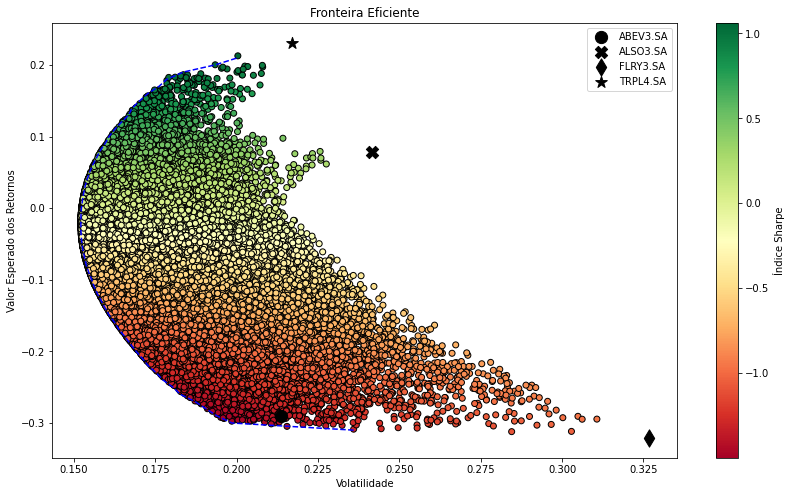

In [180]:
MARKS = ['o', 'X', 'd', '*']


fig, ax = plt.subplots(figsize=(14,8))
plt.scatter(portf_results_df.volatilidade, portf_results_df.retornos, c=portf_results_df.indice_sharpe, cmap='RdYlGn', edgecolors='black')
plt.colorbar(label='Índice Sharpe')


ax.set(xlabel='Volatilidade',
       ylabel='Valor Esperado dos Retornos',
       title='Fronteira Eficiente')
ax.plot(vol_portf_ef, retorno_portf_ef, 'b--')

for indice_acao in range(n_acoes):
  ax.scatter(x=np.sqrt(mat_cov.iloc[indice_acao, indice_acao]), 
             y=retornos_med[indice_acao], 
             marker=MARKS[indice_acao], 
             s=150, 
             color='black', 
             label=lista_acoes[indice_acao])
ax.legend()
plt.plot()

# Obtendo os portfólios com maior Índice Sharpe e menor volatilidade

## Exibindo os valores do índice Sharpe, Volatilidade e pesos dos portfólios

In [181]:
ind_sharpe_max = np.argmax(portf_results_df.indice_sharpe)
max_sharpe_portf = portf_results_df.loc[ind_sharpe_max]

ind_vol_min = np.argmin(portf_results_df.volatilidade)
min_vol_portf = portf_results_df.loc[ind_vol_min]

In [182]:
print('Portfólio com Índice Sharpe Máximo ----')
print('Performance')
for index, value in max_sharpe_portf.items():
  print(f'{index}: {100 * value:.2f}% ', end="", flush=True)

print('\nWeights')
for x, y in zip(lista_acoes, w[np.argmax(portf_results_df.indice_sharpe)]):
  print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Portfólio com Índice Sharpe Máximo ----
Performance
retornos: 21.26% volatilidade: 20.04% indice_sharpe: 106.12% 
Weights
ABEV3.SA: 0.30% ALSO3.SA: 10.10% FLRY3.SA: 0.24% TRPL4.SA: 89.36% 

In [183]:
print('Portfólio com Volatilidade Mínima ----')
print('Performance')
for index, value in min_vol_portf.items():
  print(f'{index}: {100 * value:.2f}% ', end="", flush=True)

print('\nWeights')
for x, y in zip(lista_acoes, w[np.argmin(portf_results_df.volatilidade)]):
  print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Portfólio com Volatilidade Mínima ----
Performance
retornos: -1.91% volatilidade: 15.21% indice_sharpe: -12.55% 
Weights
ABEV3.SA: 35.39% ALSO3.SA: 27.92% FLRY3.SA: 4.16% TRPL4.SA: 32.53% 

## Identificando graficamente os porfólios

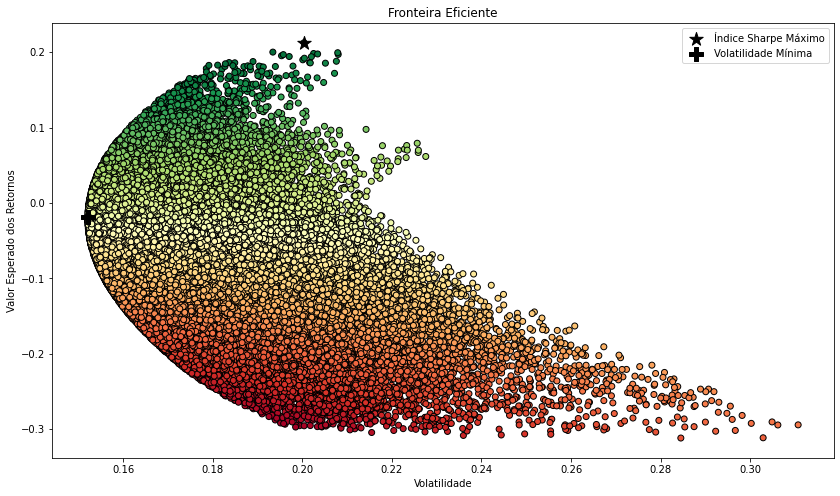

In [184]:
fig, ax = plt.subplots(figsize=(14,8))

plt.scatter(portf_results_df.volatilidade, portf_results_df.retornos, c=portf_results_df.indice_sharpe, cmap='RdYlGn', edgecolors='black')

ax.scatter(x=max_sharpe_portf.volatilidade, y=max_sharpe_portf.retornos, c='black', marker='*', s=200, label='Índice Sharpe Máximo')
ax.scatter(x=min_vol_portf.volatilidade, y=min_vol_portf.retornos, c='black', marker='P', s=200, label='Volatilidade Mínima')
ax.set(xlabel='Volatilidade', ylabel='Valor Esperado dos Retornos', title='Fronteira Eficiente')
ax.legend()
plt.show()

É notório perceber que entre 2018-2019 esse portfólio de ações foi notavelmente mais baixo em comparação a 2017-2018. Pode ser devido fatores externos, por exemplo, como o mercado se comportou diante da nova gestão do país, tendo em vista que 2018 foi ano de eleição, em 2019 um novo presidente assume.
Valores: 


*   2017-2018 Portfólio com Índice Sharpe Máximo: 270.53% (Índice Sharpe)
*   2017-2018 Portfólio com Volatilidade Mínima: 229.92% (Índice Sharpe)
*   2018-2019 Portfólio com Índice Sharpe Máximo: 106.12% (Índice Sharpe)
*   2018-2019 Portfólio com Volatilidade Mínima: -12.55 (Índice Sharpe)


# **RESPOSTA GERAL**

Fica evidente que o Índice Sharpe fica volátil com o decorrer dos anos, com saltos exorbitantes. Desse modo, fica compreensível que em um determinado ano o retorno pode ter sido ótimo em relação à variância, ficando por vezes acima dos 100% no Índice Sharpe, mas isso não significa que no ano posterior o portfólio mantenha a mesma força com excelentes resultados. Nesse caso, é viável realizar novas análises e apostar em um novo portfólio, com diferentes ações e diferentes pesos. Especular o mercado é uma tarefa bastante complicada, e os valores tanto de queda quanto de aumento são bastante expressivos, deve-se ter bastante atenção.